In [ ]:
#Calculate (in J) the heat to increase the temp of 100 g water from 25.0 to 75.0 degrees.
mass_water = 100.00 # g
Cp_water = 75.4 # J/mol/K
delT = 75.0 - 25.0 # difference, therefore C = K
MW_water = 18 # g/mol
heat = mass_water/MW_water * Cp_water * delT
print(heat, "J")
print("{0:.3g} J".format(heat))
print("The heat required to raise the temperature of {0:.2f} g of water by {1:.1f} K is {2:.3g} J.".format(mass_water,delT,heat))

20944.444444444445 J
2.09e+04 J
The heat required to raise the temperature of 100.00 g of water by 50.0 K is 2.09e+04 J.


In [ ]:
#HW sets have more than 1 question, so let's solve this in a way that allows us to answer multiple questions of the same type.
def mol_water(m):
  return m/18
Cp_water = 75.4 # J/mol/K, this could also be represented by a function as Cp changes with temperature.
def delT(T1,T2):
  return T2 - T1
def heat(m,T1,T2):
  return mol_water(m) * Cp_water * delT(T1,T2)
print(heat(100,25,75), "J")
print("{0:.3g} J".format(heat(100,25,75)))
print("The heat required to raise the temperature of {0:.2f} mol of water by {1:.1f} K is {2:.3g} J.".format(mol_water(100),delT(25,75),heat(100,25,75)))

20944.444444444445 J
2.09e+04 J
The heat required to raise the temperature of 5.56 mol of water by 50.0 K is 2.09e+04 J.


In [ ]:
#Let's compute the mean (and more!) of a list using...
from scipy import stats as st
list = [65.1,83.5,69.9]
#my own function,
def mean(a):
  running_sum = 0
  index = 0
  for i in a:
    running_sum = running_sum + i
    index = index + 1
  return running_sum/index
print(mean(list))
#built-in summation and count functions,
print(sum(list)/len(list))
#and a library (this is the "and more" from earlier).
print(st.describe(list))
print(st.tstd(list))

72.83333333333333
72.83333333333333
DescribeResult(nobs=3, minmax=(65.1, 83.5), mean=72.83333333333333, variance=91.09333333333336, skewness=0.5112859614859505, kurtosis=-1.4999999999999991)
9.544282756359085


In [ ]:
#Analzying the distribution of chemical shift data, Mark is an NMR spectroscopist so strap in folks.
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load the data into your notebook...
data_url='http://www.bmrb.wisc.edu/ftp/pub/bmrb/statistics/chem_shifts/full/devise/TRP_HE1_sel.txt'
df = pd.read_csv(data_url, names=("id","mol","282","resi","resn","name","element","shift","n"))
df.head()

,id,mol,282,resi,resn,name,element,shift,n
0,15835,protein,282,149,TRP,HE1,H,-1.2790,1
1,36103,protein,282,32,TRP,HE1,H,4.6900,1
2,6934,protein,282,127,TRP,HE1,H,5.0000,4
3,17246,protein,282,65,TRP,HE1,H,5.0290,1
4,16933,protein,282,59,TRP,HE1,H,5.1154,1


In [ ]:
#This describes numeric data types; id, 282, and resi are recognized, but only the shift column is relevant.
df.describe()

,id,282,resi,shift
count,9133.000000,9133.0,9133.000000,9133.000000
mean,15517.084857,282.0,58.873426,10.091812
std,9032.072878,0.0,47.376556,1.452586
min,5.000000,282.0,1.000000,-1.279000
25%,6782.000000,282.0,24.000000,9.910000
50%,16195.000000,282.0,47.000000,10.130000
75%,19483.000000,282.0,84.000000,10.355000
max,50409.000000,282.0,392.000000,131.711000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f521222dcc0>]],
      dtype=object)

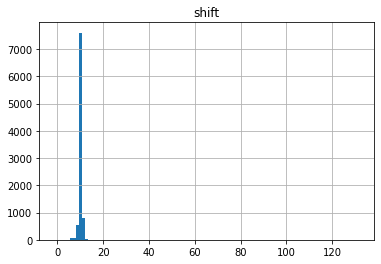

In [ ]:
df.hist('shift', bins=100)
#Representing the frequency of all the data - outliers! Let's exlude those beyond 3 standard deviations (refer to df.describe above).

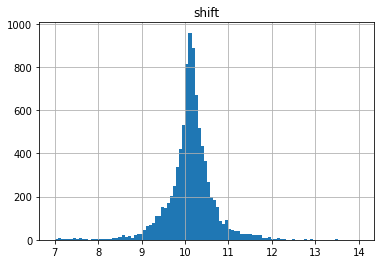

In [ ]:
df2 = df.loc[(df['shift'] > 7) & (df['shift'] < 14)]
samples = df2['shift'].tolist()
df.hist('shift', range=(7,14), bins=100)
plt.show()

In [ ]:
r = st.describe(samples)
r

DescribeResult(nobs=9040, minmax=(7.0089999999999995, 13.49), mean=10.118849395575221, variance=0.3012070142058683, skewness=-0.5765130287273053, kurtosis=5.697000087163614)

In [ ]:
(mu, sigma) = st.norm.fit(samples)
print("Chemical Shift Mean: {0:.2f} +/- {1:.2f} ppm.".format(mu, sigma))

Chemical Shift Mean: 10.12 +/- 0.55 ppm.


(14.0, 7.0)

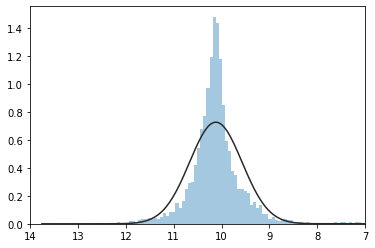

In [ ]:
ax = sns.distplot(samples, bins=100, kde=False, fit=st.norm)
ax.set_xlim([14,7])
#This is not a good fit of these data. Let's try a different fit.

(14.0, 7.0)

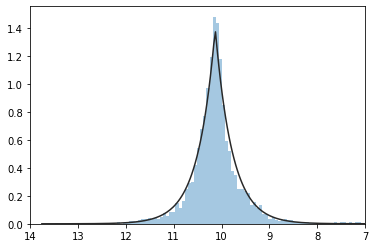

In [ ]:
ax = sns.distplot(samples, bins=100, kde=False, fit=st.laplace)
ax.set_xlim([14,7])
#This is a Laplacian distribution. It is a better fit for these data. What physical phenomenon can be described by a Laplacian? What does this tell us about the distribution of chemical shifts?